In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Load dateset and display basic information

In [4]:
df = pd.read_csv('./datasets/full_cleaned_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Columns: 111 entries, Unnamed: 0 to marketcap
dtypes: float64(91), int64(15), object(5)
memory usage: 823.1+ KB


Calcualte the Altman-Z score for each observation (where possible)
And show the top and bottom 5 companies based on the Altman-Z score

In [ ]:
df["z_score"] = 1.2*(df["totalCurrentAssets"]/df["totalAssets"]) + 1.4*df["retainedEarnings"]/df["totalAssets"] + 3.3 * (df["ebitda"]-df["depreciationAndAmortization_income_statement"])/df["totalAssets"] + 0.6*df["marketcap"] / df["totalLiabilities"] + 0.999*df["revenue"]/df["totalAssets"]
df["z_score"] = df["z_score"].round(2)
df.dropna(subset=['z_score'], inplace=True)

df_zscore_analysis = df[['symbol', 'year', 'z_score', 'distressed', 'totalCurrentAssets', 'totalAssets', 'retainedEarnings', 'ebitda', 'depreciationAndAmortization_income_statement', 'totalLiabilities', 'marketcap', 'revenue']]
df_zscore_print = df[['symbol', 'year', 'z_score', 'distressed']]
print(df_zscore_print.sort_values(by=['z_score'], ascending=False).head(10))
print(df_zscore_print.sort_values(by=['z_score'], ascending=True).head(10))

      symbol  year  z_score  distressed
141  BION.SW  2020    46.41           0
105  BANB.SW  2021    41.12           0
296  EMSN.SW  2021    35.45           0
144  BEAN.SW  2021    34.99           0
142  BEAN.SW  2023    34.77           0
297  EMSN.SW  2020    33.59           0
145  BEAN.SW  2020    32.48           0
294  EMSN.SW  2023    32.25           0
661  SENS.SW  2023    26.94           0
663  SENS.SW  2021    25.52           0
      symbol  year  z_score  distressed
16   ADXN.SW  2023  -113.64           0
17   ADXN.SW  2022   -64.61           0
18   ADXN.SW  2021   -16.77           0
19   ADXN.SW  2020   -15.86           0
638  SANN.SW  2022   -15.77           0
397  IDIA.SW  2023    -9.46           0
640  SANN.SW  2020    -9.39           0
639  SANN.SW  2021    -9.15           0
869  WIHN.SW  2023    -7.41           0
870  WIHN.SW  2022    -6.28           0


The Altman-Z score is usually interpreted as follows:
- Z > 3.0: Safe zone
- 1.8 < Z < 3.0: Grey zone
- Z < 1.8: Distress zone

Looking at the top and bottom 10, we get very extreme values (above 25 and below -6) which are likely due to the faulty or inaccurate data. These entries should be considered as outliers and removed for further analysis.
Interestingly, in the bottom 10, we don't have companies that we considered to be distressed. In a next step let's take a look at the score of the distressed companies.

In [11]:
print(df_zscore_print.where(df_zscore_print['distressed'] == 1).sort_values(by=['z_score'], ascending=False).dropna())

      symbol    year  z_score  distressed
929  STLN.SW  2022.0     2.43         1.0
930  STLN.SW  2022.0     2.43         1.0
931  STLN.SW  2022.0     2.43         1.0
932  STLN.SW  2022.0     2.43         1.0
936  STLN.SW  2021.0     2.24         1.0
935  STLN.SW  2021.0     2.24         1.0
934  STLN.SW  2021.0     2.24         1.0
933  STLN.SW  2021.0     2.24         1.0
925  STLN.SW  2023.0     1.39         1.0
926  STLN.SW  2023.0     1.39         1.0
927  STLN.SW  2023.0     1.39         1.0
928  STLN.SW  2023.0     1.39         1.0
937  STLN.SW  2020.0     0.82         1.0
938  STLN.SW  2020.0     0.82         1.0
939  STLN.SW  2020.0     0.82         1.0
940  STLN.SW  2020.0     0.82         1.0
917  CSGN.SW  2022.0     0.46         1.0
918  CSGN.SW  2021.0     0.41         1.0
919  CSGN.SW  2020.0     0.39         1.0
920  CSGN.SW  2019.0     0.35         1.0


We can see the the Altman-Z score does seem to be a decent indicator in the case of our distressed companies.
CSGN (Credit Suisse) does have a very low score
STLN (Swiss Steel Holding) had a low score in 2020, but it recovered in later years. Checking the news, it shows that the company went through rebranding, after some stressful years.

<BarContainer object of 759 artists>

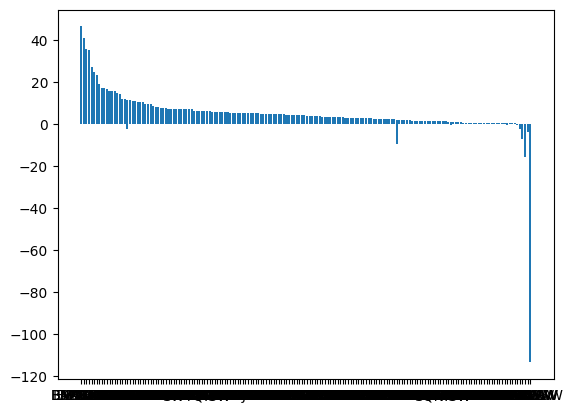

In [14]:
# barchart of df_zscore_analysis	
df_zscore_analysis = df_zscore_analysis.sort_values(by=['z_score'], ascending=False)

plt.bar(df_zscore_analysis['symbol'], df_zscore_analysis['z_score'])
